# Import Libreries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Data under CSV file

Variable:-	Description

CustomerID:-	  Unique customer ID

Churn:-	   Churn Flag

Tenure:-	   Tenure of customer in organization

PreferredLoginDevice:-	  Preferred login device of customer

CityTier:-	  City tier

WarehouseToHome:-	  Distance in between warehouse to home of customer

PreferredPaymentMode:-	  Preferred payment method of customer

Gender:-	  Gender of customer

HourSpendOnApp:-	  Number of hours spend on mobile application or website

NumberOfDeviceRegistered:-	  Total number of deceives is registered on particular customer

PreferedOrderCat:-	  Preferred order category of customer in last month

SatisfactionScore:-	   Satisfactory score of customer on service

MaritalStatus:-	   Marital status of customer

NumberOfAddress:-	   Total number of added added on particular customer

Complain:-	   Any complaint has been raised in last month

OrderAmountHikeFromlastYear:-	  Percentage increases in order amount from last year

CouponUsed:-	   Total number of coupon has been used by the customer
 
OrderCount:-	  Total number of orders has been places by the customer

DaySinceLastOrder:-   	Day Since last order by customer

CashbackAmount:- The amount of cashback received by the customer

churn:- Indicates whether the customer is going to churn (1 for yes, 0 for no), i.e.,
whether the customer will stop/leave using the ecomerce platform.

# Step 1:- Load and Explore the Dataset

In [2]:
df = pd.read_csv("E Commerce Dataset.csv")
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [3]:
df.info()   # Summary of columns & datatypes
df.shape    # (rows, columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

(5630, 20)

In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


# Step 3: Data Cleaning

In [5]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
df.isna().sum()*100/len(df)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

Null Value Imputation

In [7]:
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for column in list(numerical_columns):
    df[column].fillna(df[column].median(),inplace = True)

In [8]:
df.isna().sum()*100/len(df)

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

In [10]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

As mobile phone and phones are same, let's merge them

In [11]:
category_mapping = {'Phone': 'Mobile Phone'}
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(category_mapping)
print(df['PreferredLoginDevice'].value_counts())


PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


In [12]:
df.replace({ "PreferredLoginDevice": {'Mobile Phone': 0, 'Computer': 1}}, inplace=True)

In [13]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

As Credit Card and CC are same, let's megre them

As COD and Cash on delivery are same , let's merge them

In [14]:
category_mapping = {'CC': 'Credit Card'}
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(category_mapping)
print(df['PreferredPaymentMode'].value_counts())


PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64


In [15]:
category_mapping = {'COD': 'Cash on Delivery'}
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(category_mapping)
print(df['PreferredPaymentMode'].value_counts())


PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64


In [16]:
df.replace({"Gender": {'Male': 0, "Female":1}}, inplace=True)

In [17]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [18]:
category_mapping = {'Mobile': 'Mobile Phone'}
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(category_mapping)
print(df['PreferedOrderCat'].value_counts())


PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64


In [19]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

In [20]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

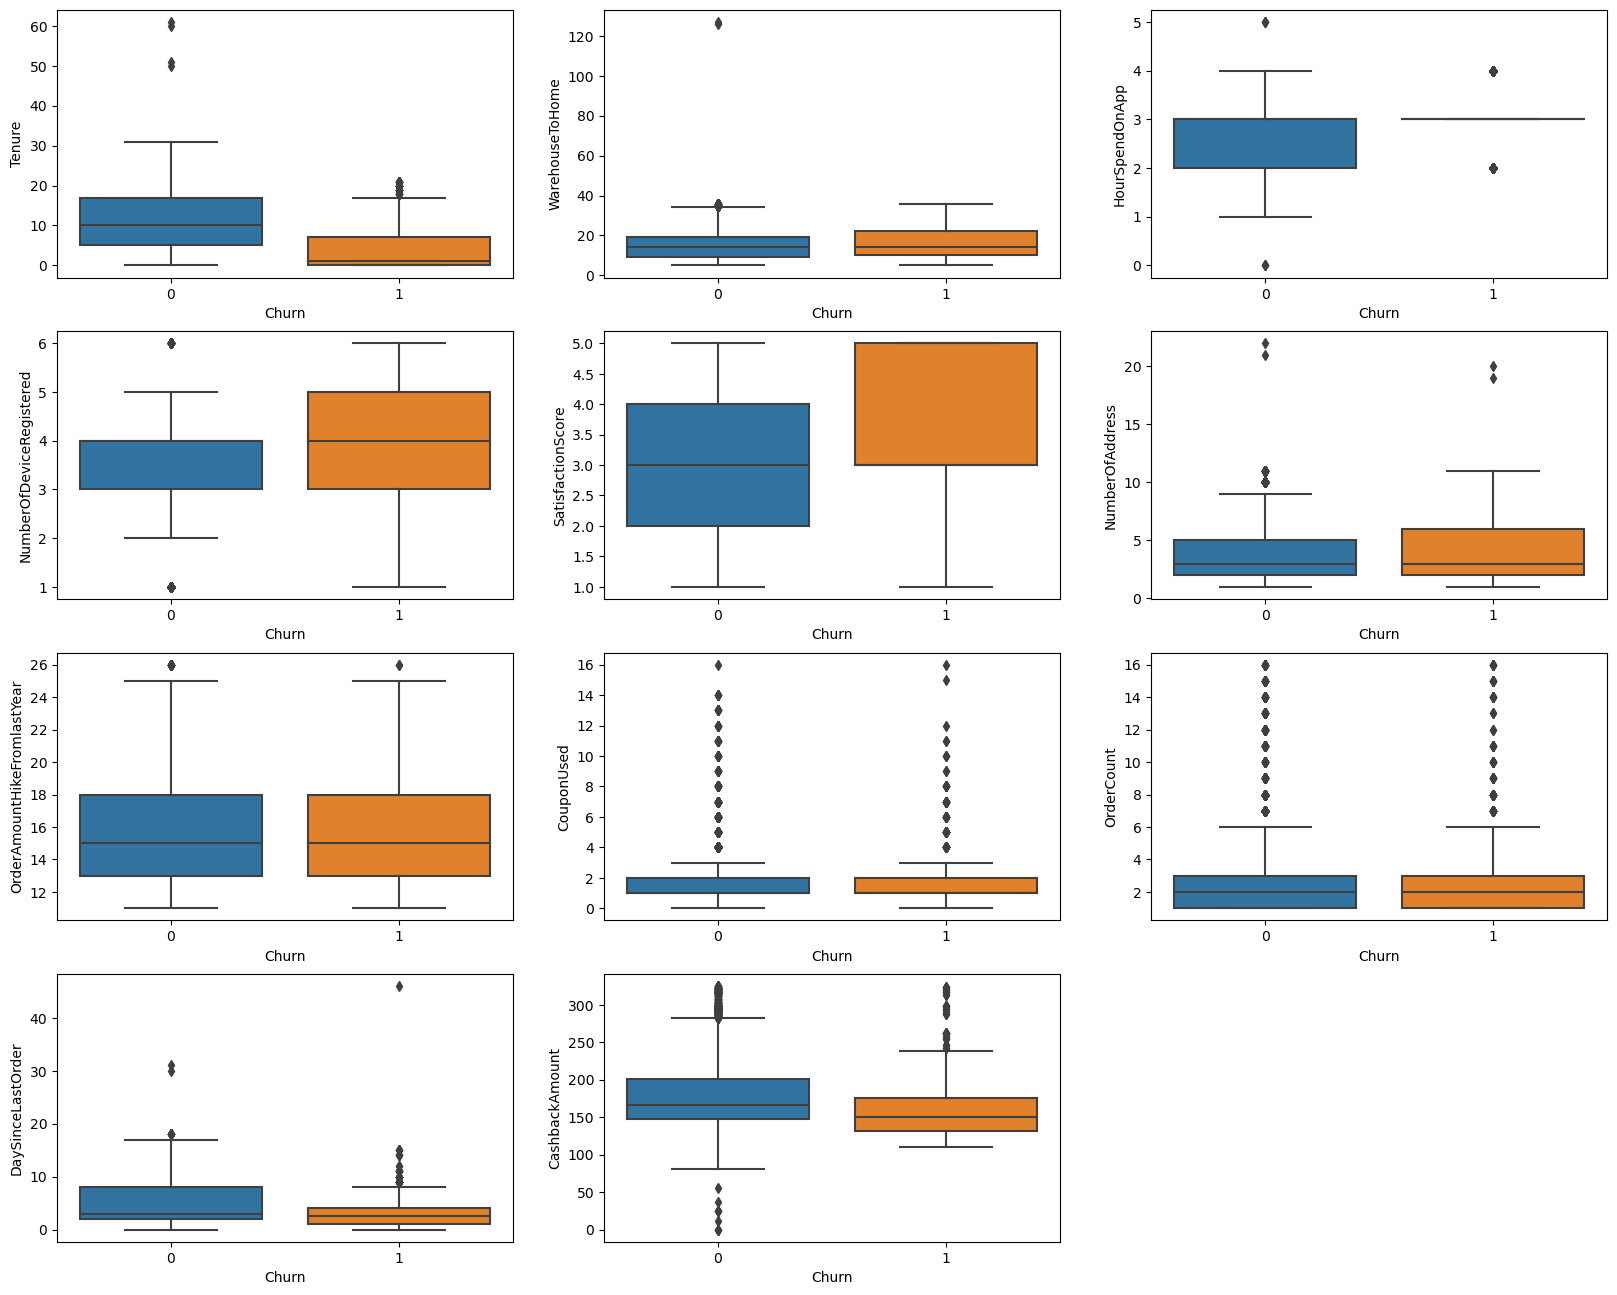

In [21]:
## Visualizing numerical variables

plt.figure(figsize=(20,16))
plt.subplot(4,3,1)
sns.boxplot(x = 'Churn', y = 'Tenure', data = df)
plt.subplot(4,3,2)
sns.boxplot(x = 'Churn', y = 'WarehouseToHome', data = df)
plt.subplot(4,3,3)
sns.boxplot(x = 'Churn', y = 'HourSpendOnApp', data = df)
plt.subplot(4,3,4)
sns.boxplot(x = 'Churn', y = 'NumberOfDeviceRegistered', data = df)
plt.subplot(4,3,5)
sns.boxplot(x = 'Churn', y = 'SatisfactionScore', data = df)
plt.subplot(4,3,6)
sns.boxplot(x = 'Churn', y = 'NumberOfAddress', data = df)
plt.subplot(4,3,7)
sns.boxplot(x = 'Churn', y = 'OrderAmountHikeFromlastYear', data = df)
plt.subplot(4,3,8)
sns.boxplot(x = 'Churn', y = 'CouponUsed', data = df)
plt.subplot(4,3,9)
sns.boxplot(x = 'Churn', y = 'OrderCount', data = df)
plt.subplot(4,3,10)
sns.boxplot(x = 'Churn', y = 'DaySinceLastOrder', data = df)
plt.subplot(4,3,11)
sns.boxplot(x = 'Churn', y = 'CashbackAmount', data = df)

plt.show()

In [22]:
categorical_features = ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

In [23]:
numerical_features = ['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [24]:
df_features = df[numerical_features + categorical_features + ['Churn'] ]
df_features.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Churn
0,4.0,0,3,6.0,1,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160,Debit Card,Laptop & Accessory,Single,1
1,9.0,0,1,8.0,0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121,UPI,Mobile Phone,Single,1
2,9.0,0,1,30.0,0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120,Debit Card,Mobile Phone,Single,1
3,0.0,0,3,15.0,0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134,Debit Card,Laptop & Accessory,Single,1
4,0.0,0,1,12.0,0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,130,Credit Card,Mobile Phone,Single,1
5,0.0,1,1,22.0,1,3.0,5,5,2,1,22.0,4.0,6.0,7.0,139,Debit Card,Mobile Phone,Single,1
6,9.0,0,3,11.0,0,2.0,3,2,4,0,14.0,0.0,1.0,0.0,121,Cash on Delivery,Laptop & Accessory,Divorced,1
7,9.0,0,1,6.0,0,3.0,3,2,3,1,16.0,2.0,2.0,0.0,123,Credit Card,Mobile Phone,Divorced,1
8,13.0,0,3,9.0,0,3.0,4,3,2,1,14.0,0.0,1.0,2.0,127,E wallet,Mobile Phone,Divorced,1
9,9.0,0,1,31.0,0,2.0,5,3,2,0,12.0,1.0,1.0,1.0,123,Debit Card,Mobile Phone,Single,1


# Step 3 : Create Features From The Data

In [25]:
def train_test_split_and_features(df_features):
    y = df_features["Churn"]
    x = df_features.drop('Churn',axis=1)
    x = pd.get_dummies(x,dtype = int)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features

In [26]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df_features)

   Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0     4.0                     0         3              6.0       1   
1     9.0                     0         1              8.0       0   
2     9.0                     0         1             30.0       0   
3     0.0                     0         3             15.0       0   
4     0.0                     0         1             12.0       0   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0             3.0                         3                  2   
1             3.0                         4                  3   
2             2.0                         4                  3   
3             2.0                         4                  5   
4             3.0                         3                  5   

   NumberOfAddress  Complain  ...  PreferredPaymentMode_E wallet  \
0                9         1  ...                              0   
1                7         1  ...             

In [27]:
x_train.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1294,15.0,0,1,24.0,0,2.0,3,5,7,1,...,0,0,0,0,1,0,0,0,1,0
3904,18.0,0,1,9.0,1,4.0,2,1,3,1,...,0,0,1,0,0,0,0,0,1,0
3523,1.0,0,1,13.0,0,3.0,5,3,3,0,...,0,0,0,0,0,1,0,1,0,0
2100,18.0,0,3,17.0,1,2.0,3,1,4,0,...,0,0,0,1,0,0,0,0,1,0
4481,5.0,0,3,14.0,0,4.0,4,1,6,0,...,1,0,0,0,1,0,0,0,1,0
203,6.0,1,3,16.0,0,2.0,4,2,4,0,...,1,0,0,0,1,0,0,0,0,1
578,11.0,1,3,16.0,1,2.0,3,2,2,1,...,0,0,0,0,1,0,0,0,0,1
2743,6.0,1,1,13.0,0,2.0,3,3,2,0,...,0,0,0,0,1,0,0,0,1,0
3514,16.0,0,1,36.0,0,3.0,6,2,6,0,...,0,0,0,0,1,0,0,0,0,1
1085,9.0,0,1,27.0,0,3.0,1,4,2,0,...,0,0,0,0,0,1,0,0,1,0


# Step:- 4 Fit and Evaluate Model

In [28]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test,max_depth=5,min_sample_split=0.01,max_features=0.8,max_samples=0.8):
    random_forest = RandomForestClassifier(random_state=0,\
                                          max_depth=max_depth,\
                                          min_samples_split=min_sample_split,\
                                          max_features=max_features,
                                          max_samples=max_samples)
    
    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print("confussion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:" ,random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    return model

In [29]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confussion matrix
[[892  47]
 [ 82 105]]


Accuracy of Random Forest: 88.54351687388987 

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       939
           1       0.69      0.56      0.62       187

    accuracy                           0.89      1126
   macro avg       0.80      0.76      0.78      1126
weighted avg       0.88      0.89      0.88      1126



# Step:-5 Try different Parameter to identify best ones

In [30]:
param_grid = [
   {'max_depth': [3,5,7,10], 'min_samples_split': [0.01,0.03,0.07,0.1],
'max_features': [0.7,0.8,0.9,1.0],
'max_samples': [0.7,0.8,0.9,1.0]}]

In [31]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.880 total time=   0.9s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.881 total time=   0.9s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.891 total time=   0.9s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.868 total time=   0.9s
[CV 5/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.881 total time=   0.9s
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.878 total time=   1.0s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.879 total time=   0.9s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.886 total time=   0.9s


[CV 1/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.875 total time=   0.9s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.879 total time=   0.9s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.889 total time=   0.8s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.868 total time=   0.9s
[CV 5/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.878 total time=   0.8s
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.862 total time=   0.8s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.868 total time=   0.8s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.876 total time=   0.8s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=1.0, min_sa

[CV 2/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.885 total time=   1.0s
[CV 3/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.890 total time=   0.9s
[CV 4/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.875 total time=   1.0s
[CV 5/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.879 total time=   0.9s
[CV 1/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.878 total time=   1.0s
[CV 2/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.883 total time=   0.9s
[CV 3/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.890 total time=   0.9s
[CV 4/5] END max_depth=3, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.875 total time=   0.9s
[CV 5/5] END max_depth=3, max_features=0.8, max_samples=1.0, min

[CV 3/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.888 total time=   0.9s
[CV 4/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.868 total time=   0.9s
[CV 5/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.874 total time=   0.9s
[CV 1/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.862 total time=   0.9s
[CV 2/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.868 total time=   0.9s
[CV 3/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.876 total time=   0.9s
[CV 4/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.860 total time=   0.9s
[CV 5/5] END max_depth=3, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.872 total time=   0.9s
[CV 1/5] END max_depth=3, max_features=0.9, max_samples=1.0, min_samp

[CV 4/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.875 total time=   1.0s
[CV 5/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.882 total time=   1.0s
[CV 1/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.877 total time=   1.3s
[CV 2/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.883 total time=   1.0s
[CV 3/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.890 total time=   1.0s
[CV 4/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.873 total time=   1.0s
[CV 5/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.882 total time=   1.0s
[CV 1/5] END max_depth=3, max_features=1.0, max_samples=0.9, min_samples_split=0.07;, score=0.880 total time=   1.0s
[CV 2/5] END max_depth=3, max_features=1.0, max_samples=0.9, min

[CV 5/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.07;, score=0.876 total time=   1.0s
[CV 1/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.870 total time=   0.9s
[CV 2/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.868 total time=   0.9s
[CV 3/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.876 total time=   0.9s
[CV 4/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.865 total time=   0.9s
[CV 5/5] END max_depth=5, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.874 total time=   0.9s
[CV 1/5] END max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.01;, score=0.895 total time=   1.2s
[CV 2/5] END max_depth=5, max_features=0.7, max_samples=0.9, min_samples_split=0.01;, score=0.906 total time=   1.2s
[CV 3/5] END max_depth=5, max_features=0.7, max_samples=0.9, min_samp

[CV 1/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.882 total time=   1.2s
[CV 2/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.895 total time=   1.2s
[CV 3/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.897 total time=   1.2s
[CV 4/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.871 total time=   1.2s
[CV 5/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.882 total time=   1.2s
[CV 1/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.07;, score=0.875 total time=   1.1s
[CV 2/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.07;, score=0.881 total time=   1.1s
[CV 3/5] END max_depth=5, max_features=0.8, max_samples=0.8, min_samples_split=0.07;, score=0.888 total time=   1.1s
[CV 4/5] END max_depth=5, max_features=0.8, max_samples=0.8, min

[CV 2/5] END max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.868 total time=   1.1s
[CV 3/5] END max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.876 total time=   1.0s
[CV 4/5] END max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.860 total time=   1.0s
[CV 5/5] END max_depth=5, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.872 total time=   1.0s
[CV 1/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_samples_split=0.01;, score=0.889 total time=   1.4s
[CV 2/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_samples_split=0.01;, score=0.899 total time=   1.4s
[CV 3/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_samples_split=0.01;, score=0.905 total time=   1.4s
[CV 4/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_samples_split=0.01;, score=0.881 total time=   1.4s
[CV 5/5] END max_depth=5, max_features=0.9, max_samples=0.8, min_sam

[CV 3/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.893 total time=   1.3s
[CV 4/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.862 total time=   1.3s
[CV 5/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.884 total time=   1.3s
[CV 1/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.862 total time=   1.2s
[CV 2/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.873 total time=   1.2s
[CV 3/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.880 total time=   1.2s
[CV 4/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.868 total time=   1.2s
[CV 5/5] END max_depth=5, max_features=1.0, max_samples=0.7, min_samples_split=0.07;, score=0.873 total time=   1.2s
[CV 1/5] END max_depth=5, max_features=1.0, max_samples=0.7, min

[CV 4/5] END max_depth=5, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.860 total time=   1.4s
[CV 5/5] END max_depth=5, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.872 total time=   1.4s
[CV 1/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.901 total time=   1.5s
[CV 2/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.910 total time=   1.5s
[CV 3/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.911 total time=   1.4s
[CV 4/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.889 total time=   1.5s
[CV 5/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.904 total time=   1.5s
[CV 1/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.887 total time=   1.3s
[CV 2/5] END max_depth=7, max_features=0.7, max_samples=0.7, min_s

[CV 5/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.03;, score=0.890 total time=   1.5s
[CV 1/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.875 total time=   1.3s
[CV 2/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.881 total time=   1.3s
[CV 3/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.889 total time=   1.3s
[CV 4/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.868 total time=   1.3s
[CV 5/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.07;, score=0.878 total time=   1.3s
[CV 1/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.867 total time=   1.2s
[CV 2/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_samples_split=0.1;, score=0.870 total time=   1.2s
[CV 3/5] END max_depth=7, max_features=0.7, max_samples=1.0, min_s

[CV 1/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.901 total time=   1.9s
[CV 2/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.908 total time=   1.9s
[CV 3/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.913 total time=   1.9s
[CV 4/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.889 total time=   1.9s
[CV 5/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.01;, score=0.901 total time=   1.9s
[CV 1/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.888 total time=   1.7s
[CV 2/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.893 total time=   1.7s
[CV 3/5] END max_depth=7, max_features=0.8, max_samples=1.0, min_samples_split=0.03;, score=0.899 total time=   1.7s
[CV 4/5] END max_depth=7, max_features=0.8, max_samples=1.0, min

[CV 2/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.881 total time=   1.5s
[CV 3/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.888 total time=   1.5s
[CV 4/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.868 total time=   1.5s
[CV 5/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.07;, score=0.874 total time=   1.5s
[CV 1/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.862 total time=   1.4s
[CV 2/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.868 total time=   1.4s
[CV 3/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.876 total time=   1.4s
[CV 4/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_samples_split=0.1;, score=0.860 total time=   1.4s
[CV 5/5] END max_depth=7, max_features=0.9, max_samples=0.9, min_sam

[CV 3/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.913 total time=   2.2s
[CV 4/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.885 total time=   2.2s
[CV 5/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.01;, score=0.907 total time=   2.2s
[CV 1/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.887 total time=   1.9s
[CV 2/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.895 total time=   1.9s
[CV 3/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.898 total time=   1.9s
[CV 4/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.872 total time=   1.9s
[CV 5/5] END max_depth=7, max_features=1.0, max_samples=0.9, min_samples_split=0.03;, score=0.888 total time=   1.9s
[CV 1/5] END max_depth=7, max_features=1.0, max_samples=0.9, min

[CV 3/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.07;, score=0.889 total time=   1.3s
[CV 4/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.07;, score=0.868 total time=   1.3s
[CV 5/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.07;, score=0.877 total time=   1.3s
[CV 1/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.862 total time=   1.2s
[CV 2/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.880 total time=   1.2s
[CV 3/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.876 total time=   1.2s
[CV 4/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.859 total time=   1.2s
[CV 5/5] END max_depth=10, max_features=0.7, max_samples=0.8, min_samples_split=0.1;, score=0.873 total time=   1.2s
[CV 1/5] END max_depth=10, max_features=0.7, max_samples=0.9,

[CV 3/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.01;, score=0.920 total time=   2.2s
[CV 4/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.01;, score=0.896 total time=   2.2s
[CV 5/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.01;, score=0.907 total time=   2.2s
[CV 1/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.881 total time=   1.8s
[CV 2/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.898 total time=   1.8s
[CV 3/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.899 total time=   1.8s
[CV 4/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.870 total time=   1.8s
[CV 5/5] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_split=0.03;, score=0.882 total time=   1.8s
[CV 1/5] END max_depth=10, max_features=0.8, max_samples

[CV 3/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.07;, score=0.888 total time=   1.5s
[CV 4/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.07;, score=0.868 total time=   1.5s
[CV 5/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.07;, score=0.876 total time=   1.5s
[CV 1/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.862 total time=   1.4s
[CV 2/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.868 total time=   1.3s
[CV 3/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.876 total time=   1.4s
[CV 4/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.860 total time=   1.3s
[CV 5/5] END max_depth=10, max_features=0.9, max_samples=0.7, min_samples_split=0.1;, score=0.872 total time=   1.4s
[CV 1/5] END max_depth=10, max_features=0.9, max_samples=0.8,

[CV 3/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01;, score=0.913 total time=   2.5s
[CV 4/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01;, score=0.882 total time=   2.5s
[CV 5/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.01;, score=0.911 total time=   2.5s
[CV 1/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.885 total time=   2.1s
[CV 2/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.897 total time=   2.0s
[CV 3/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.895 total time=   2.1s
[CV 4/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.862 total time=   2.0s
[CV 5/5] END max_depth=10, max_features=1.0, max_samples=0.7, min_samples_split=0.03;, score=0.880 total time=   2.1s
[CV 1/5] END max_depth=10, max_features=1.0, max_samples

[CV 3/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.07;, score=0.888 total time=   2.1s
[CV 4/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.07;, score=0.870 total time=   2.0s
[CV 5/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.07;, score=0.876 total time=   2.1s
[CV 1/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.862 total time=   1.9s
[CV 2/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.868 total time=   1.9s
[CV 3/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.876 total time=   1.9s
[CV 4/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.860 total time=   1.8s
[CV 5/5] END max_depth=10, max_features=1.0, max_samples=1.0, min_samples_split=0.1;, score=0.872 total time=   1.9s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [0.7, 0.8, 0.9, 1.0],
                          'max_samples': [0.7, 0.8, 0.9, 1.0],
                          'min_samples_split': [0.01, 0.03, 0.07, 0.1]}],
             verbose=5)

In [32]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
220,2.462913,0.019118,0.050719,0.006648,10,0.8,1.0,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.907880,0.91232,0.926748,0.895671,0.912222,0.910968,0.009959,1
236,2.737534,0.005448,0.051150,0.006346,10,0.9,1.0,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.904550,0.91010,0.926748,0.890122,0.915556,0.909415,0.012120,2
252,3.021497,0.014288,0.050508,0.006069,10,1.0,1.0,0.01,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.905660,0.91121,0.922309,0.892342,0.914444,0.909193,0.010001,3
204,2.184077,0.026496,0.053126,0.007644,10,0.7,1.0,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.904550,0.91121,0.923418,0.894562,0.912222,0.909193,0.009500,4
248,2.874751,0.036080,0.048464,0.002547,10,1.0,0.9,0.01,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.905660,0.90899,0.925638,0.891232,0.913333,0.908971,0.011158,5
216,2.359121,0.043092,0.047383,0.000997,10,0.8,0.9,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.899001,0.91232,0.921199,0.894562,0.914444,0.908305,0.009955,6
232,2.617122,0.022893,0.050228,0.006122,10,0.9,0.9,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.904550,0.91121,0.923418,0.890122,0.912222,0.908305,0.010926,7
196,1.999837,0.033722,0.065633,0.013662,10,0.7,0.8,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.906770,0.91232,0.918979,0.892342,0.907778,0.907638,0.008778,8
200,2.085230,0.027495,0.047426,0.000690,10,0.7,0.9,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.901221,0.91121,0.921199,0.892342,0.908889,0.906972,0.009707,9
212,2.269830,0.066967,0.051119,0.007267,10,0.8,0.8,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.901221,0.90899,0.920089,0.895671,0.906667,0.906528,0.008198,10


In [33]:
results_save = pd.DataFrame(search.cv_results_)
results_save.to_csv("results_save.csv", index = False)

In [34]:
search.best_params_

{'max_depth': 10,
 'max_features': 0.8,
 'max_samples': 1.0,
 'min_samples_split': 0.01}

# Step:- 6 Evaluate the Model with best parameters

In [41]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=10,\
                               max_features=0.7,max_samples=1.0)

confussion matrix
[[899  40]
 [ 69 118]]


Accuracy of Random Forest: 90.31971580817051 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       939
           1       0.75      0.63      0.68       187

    accuracy                           0.90      1126
   macro avg       0.84      0.79      0.81      1126
weighted avg       0.90      0.90      0.90      1126



In [42]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importances','feature']
importances.sort_values(by = 'importances', ascending=True,inplace=True)

Which features is more important

<BarContainer object of 28 artists>

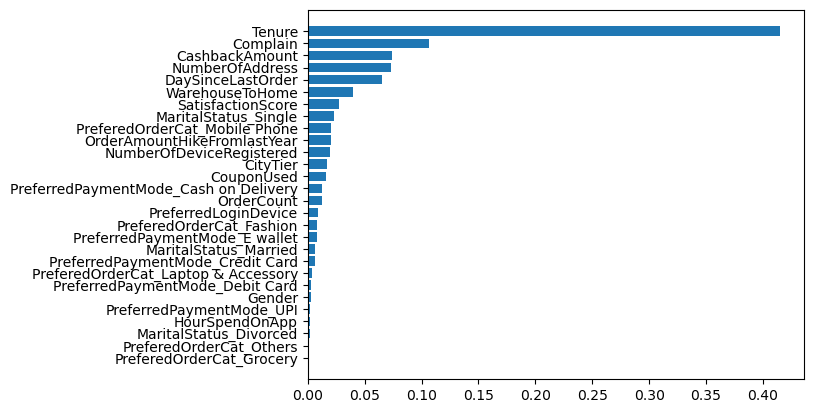

In [44]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importances)